<a href="https://colab.research.google.com/github/Aiadevop/training_model_wine_quality/blob/main/DS_NL_Clasificaci%C3%B3n_ESTUDIO_DE_DATOS_Predicci%C3%B3n_calidad_del_vino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Determinar calidad del vino a partir de parámetros químicos

OBTENER LOS DATOS:

* El dataset que estoy utilizando pertenece a Kaggle y permite su uso, por lo que no necesito de ningún permiso adicional.
* El espacio del csv es de 150kB y el colab tiene 70GB por lo que no hay problema de espacio.
* A continuación obtengo la información general del dataset y reservo 321 valores para test.

In [1]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el CSV desde la ruta Github
url="https://raw.githubusercontent.com/Aiadevop/training_model_wine_quality/refs/heads/main/data/winequality-red.csv"
df = pd.read_csv(url)

# Mostrar las primeras filas
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
# Obtengo la información básica del dataframe.
df.info()
# Me dice que tengo 1598 resultados, por lo que solo debo utilizar de estos el 80% y dejar el otro 20% para test. 1278 resultados son los que utilizaré para datos y 321 para test.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
# Resumen estadístico:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# Agrupo los valores dependiendo de la calidad de salida.
# df.groupby('quality').mean(numeric_only=True).round(2)
df.groupby('quality').agg(['mean', 'count']).round(2)


fixed acidity       volatile acidity       citric acid        \
                 mean count             mean count        mean count   
quality                                                                
3                8.36    10             0.88    10        0.17    10   
4                7.78    53             0.69    53        0.17    53   
5                8.17   681             0.58   681        0.24   681   
6                8.35   638             0.50   638        0.27   638   
7                8.87   199             0.40   199        0.38   199   
8                8.57    18             0.42    18        0.39    18   

        residual sugar       chlorides        ... total sulfur dioxide        \
                  mean count      mean count  ...                 mean count   
quality                                       ...                              
3                 2.64    10      0.12    10  ...                24.90    10   
4                 2.69    53      0.09    53  ...                36.25    53   
5                 2.53   681      0.09   681  ...                56.51   681   
6                 2.48   638      0.08   638  ...                40.87   638   
7                 2.72   199      0.08   199  ...                35.02   199   
8                 2.58    18      0.07    18  ...                33.44    18   

        density          pH       sulphates       alcohol        
           mean count  mean count      mean count    mean count  
quality                                                          
3           1.0    10  3.40    10      0.57    10    9.96    10  
4           1.0    53  3.38    53      0.60    53   10.27    53  
5           1.0   681  3.30   681      0.62   681    9.90   681  
6           1.0   638  3.32   638      0.68   638   10.63   638  
7           1.0   199  3.29   199      0.74   199   11.47   199  
8           1.0    18  3.27    18      0.77    18   12.09    18  

[6 rows x 22 columns]

* Es un proyecto supervisado ya que los datos ya están etiquetados y dependiendo de sus valores se determina la calidad del vino.
* Es un proyecto donde la calidad devuelve una variable numérica pero las clases están muy desbalanceadas ya que nos devolverá un resultado numérico por lo que me decanto por un problema de clasificación:

Por qué: La calidad del vino se mide en niveles discretos definidos por expertos (no una cantidad continua). Por tanto, tiene más sentido modelarla como un problema de clasificación.

Además: Métricas como accuracy, precision, recall y F1-score son más interpretables que errores cuadráticos cuando se trata de predecir niveles de calidad.

Nota: La clase está desbalanceada: la mayoría son 5 y 6. Esto requerirá atención (reagrupamiento, muestreo o uso de pesos en los modelos).

❗ Alternativa: Agrupar calidades
Para mejorar la capacidad predictiva y compensar el desbalance, agrupo la variable quality en menos clases.
Al estar tan desbalanceadas las clases la clasificación la voy a realizar entre dos valores quality = 0 (entre 3 y 5) y quality = 1 (entre 6 y 8). Si esta clasificación funciona podré probar después a optimizarlo de otra forma.

In [5]:
# Creo una copia del df inicial para transformar los datos
df_cl= df.copy()
df_cl['quality'] = df_cl['quality'].apply(lambda x: 1 if x >= 6 else 0)
df_cl.groupby('quality').agg(['mean', 'count']).round(2)
# Ahora ya obtengo dos clases balanceadas CALIDAD BAJA 0 / CALIDAD ALTA 1

fixed acidity       volatile acidity       citric acid        \
                 mean count             mean count        mean count   
quality                                                                
0                8.14   744             0.59   744        0.24   744   
1                8.47   855             0.47   855        0.30   855   

        residual sugar       chlorides        ... total sulfur dioxide        \
                  mean count      mean count  ...                 mean count   
quality                                       ...                              
0                 2.54   744      0.09   744  ...                54.65   744   
1                 2.54   855      0.08   855  ...                39.35   855   

        density          pH       sulphates       alcohol        
           mean count  mean count      mean count    mean count  
quality                                                          
0           1.0   744  3.31   744      0.62   744    9.93   744  
1           1.0   855  3.31   855      0.69   855   10.86   855  

[2 rows x 22 columns]

In [6]:
df_cl.groupby('quality').mean(numeric_only=True).round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
0,8.14,0.59,0.24,2.54,0.09,16.57,54.65,1.0,3.31,0.62,9.93
1,8.47,0.47,0.30,2.54,0.08,15.27,39.35,1.0,3.31,0.69,10.86


In [7]:
# Lista de columnas a analizar. Reemplazo los valores en blanco de los títulos del df que dan errores posteriores
df_cl.columns = df_cl.columns.str.replace(" ", "_")
# Voy a estudiar la varianza para estudiar datos como la densidad o el residual sugar que parecen valores constantes
df_cl.var()

,0
fixed_acidity,3.031416
volatile_acidity,0.032062
citric_acid,0.037947
residual_sugar,1.987897
chlorides,0.002215
free_sulfur_dioxide,109.414884
total_sulfur_dioxide,1082.102373
density,0.000004
pH,0.023835
sulphates,0.028733


In [9]:
df_cl.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


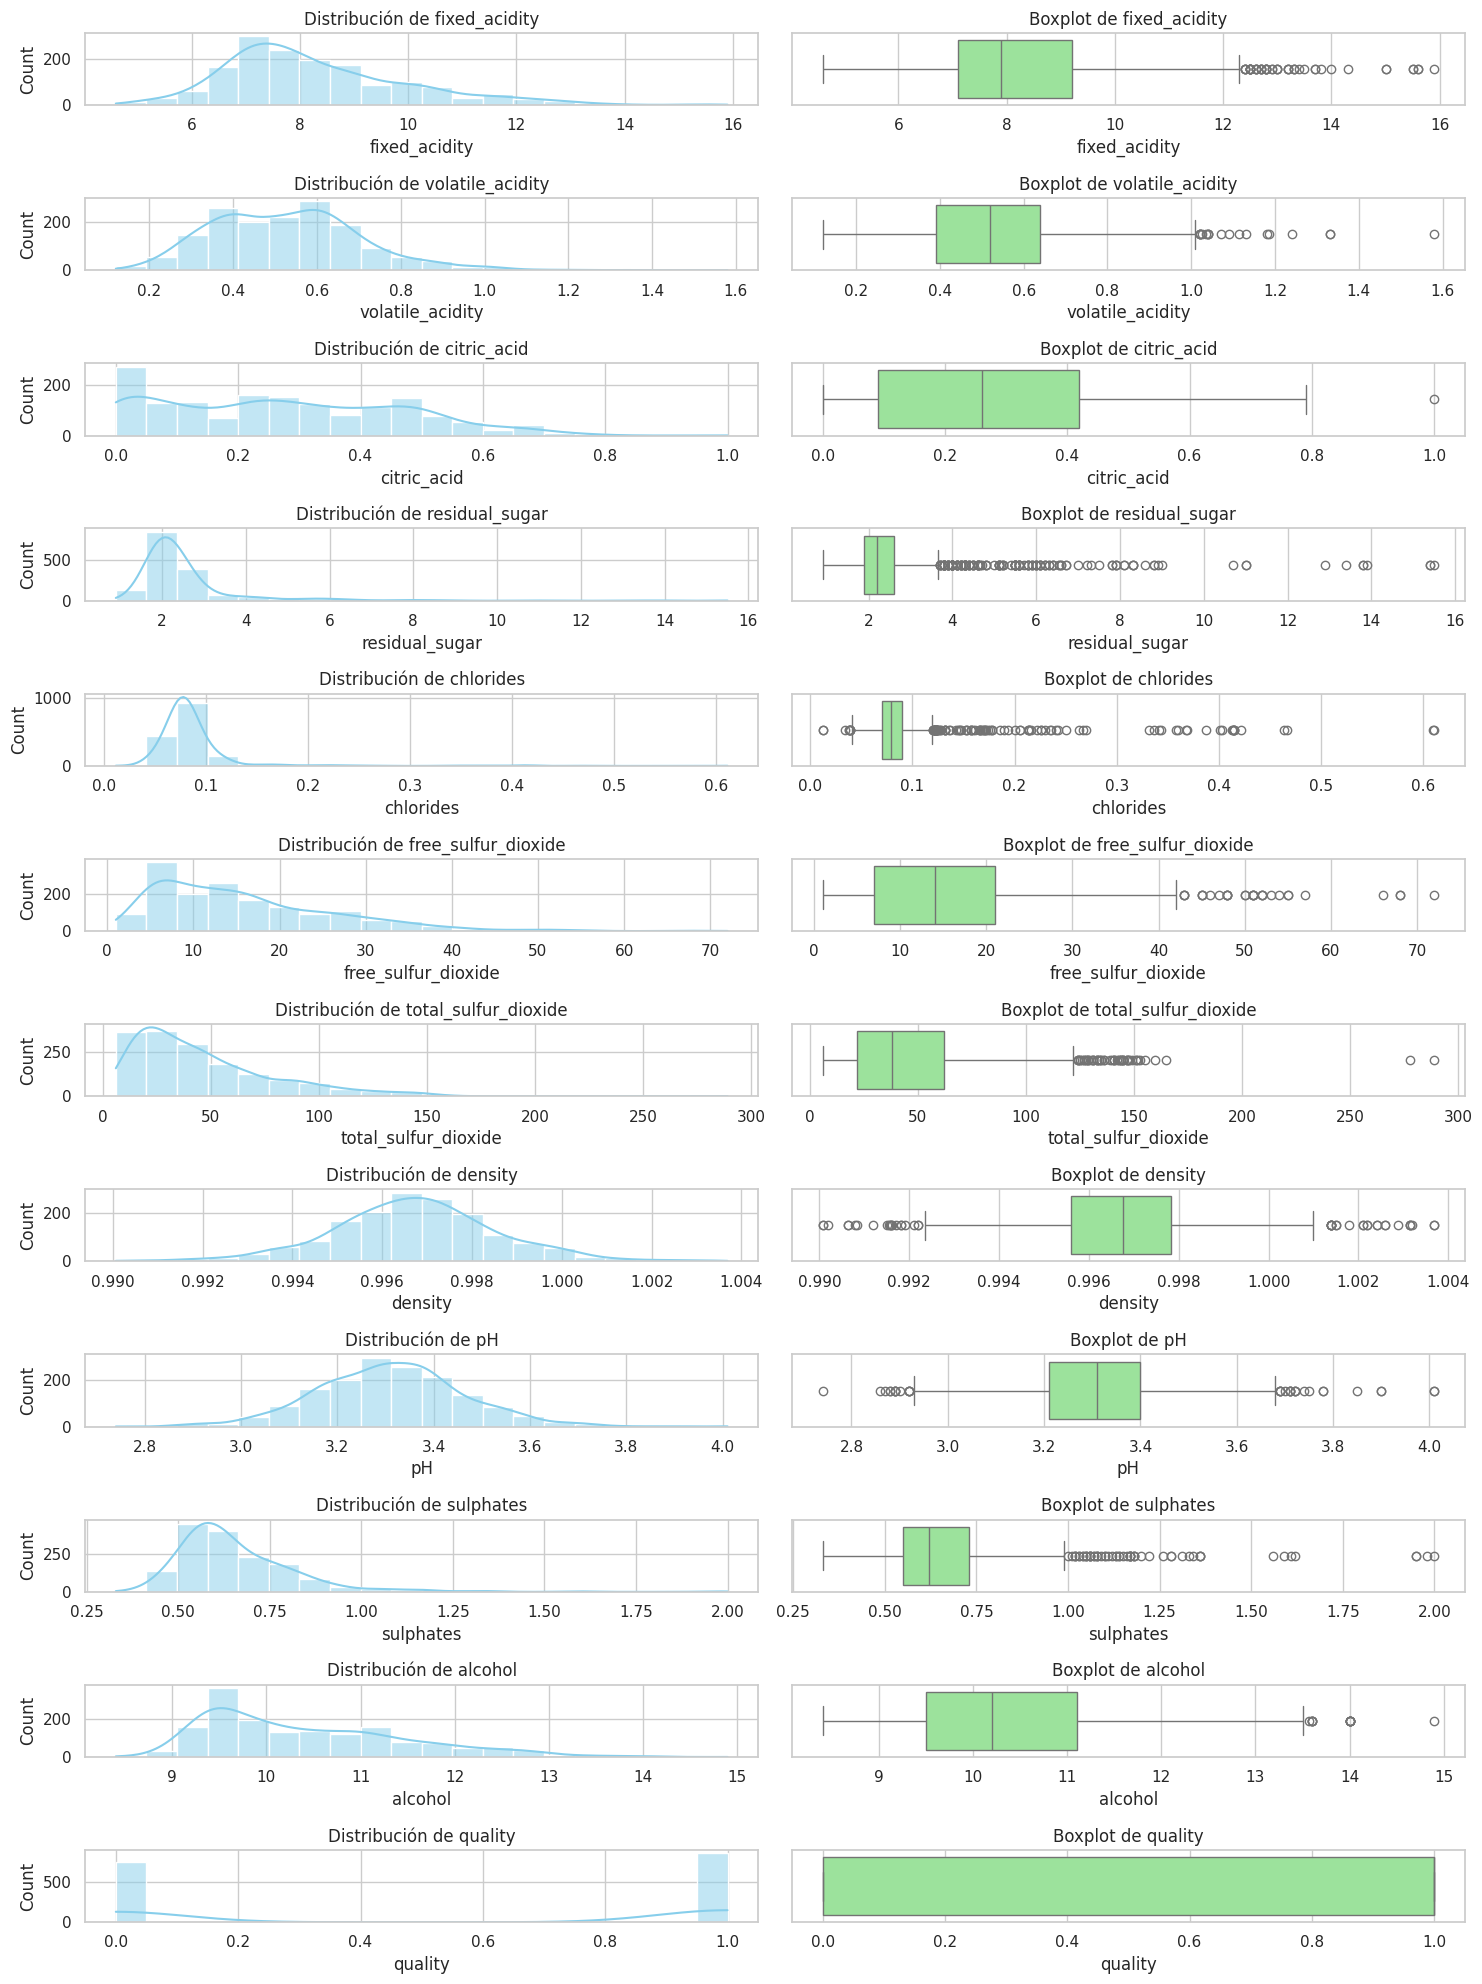

In [10]:
# Análisis univariable
variables = df_cl.columns.tolist()

# Configuración de estilo
sns.set(style="whitegrid")
plt.figure(figsize=(15, 20))

# Generar histogramas y boxplots por cada variable
for i, var in enumerate(variables):
    plt.subplot(len(variables), 2, 2*i+1)
    sns.histplot(df_cl[var], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribución de {var}')

    plt.subplot(len(variables), 2, 2*i+2)
    sns.boxplot(x=df_cl[var], color='lightgreen')
    plt.title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()

In [11]:
# Normalizar todas las variables excepto quality.
# Escojo RobustScaler y no StandarScaler o MinMaxScaler ya que los valores tienen sesgo a la derecha y muchos outliers
from sklearn.preprocessing import RobustScaler
features = df_cl.columns.drop('quality')
scaler = RobustScaler()
df_cl[features] = scaler.fit_transform(df_cl[features])

In [12]:
df_cl.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.199827,0.031282,0.033259,0.484008,0.423327,0.133923,0.211695,-0.001486,0.005859,0.211938,0.139364,0.534709
std,0.829093,0.716239,0.590306,2.014183,2.353265,0.747154,0.822383,0.844445,0.812560,0.941705,0.666042,0.498950
min,-1.571429,-1.600000,-0.787879,-1.857143,-3.350000,-0.928571,-0.800000,-2.988814,-3.000000,-1.611111,-1.125000,0.000000
25%,-0.380952,-0.520000,-0.515152,-0.428571,-0.450000,-0.500000,-0.400000,-0.514541,-0.526316,-0.388889,-0.437500,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.619048,0.480000,0.484848,0.571429,0.550000,0.500000,0.600000,0.485459,0.473684,0.611111,0.562500,1.000000
max,3.809524,4.240000,2.242424,19.000000,26.600000,4.142857,6.275000,3.105145,3.684211,7.666667,2.937500,1.000000


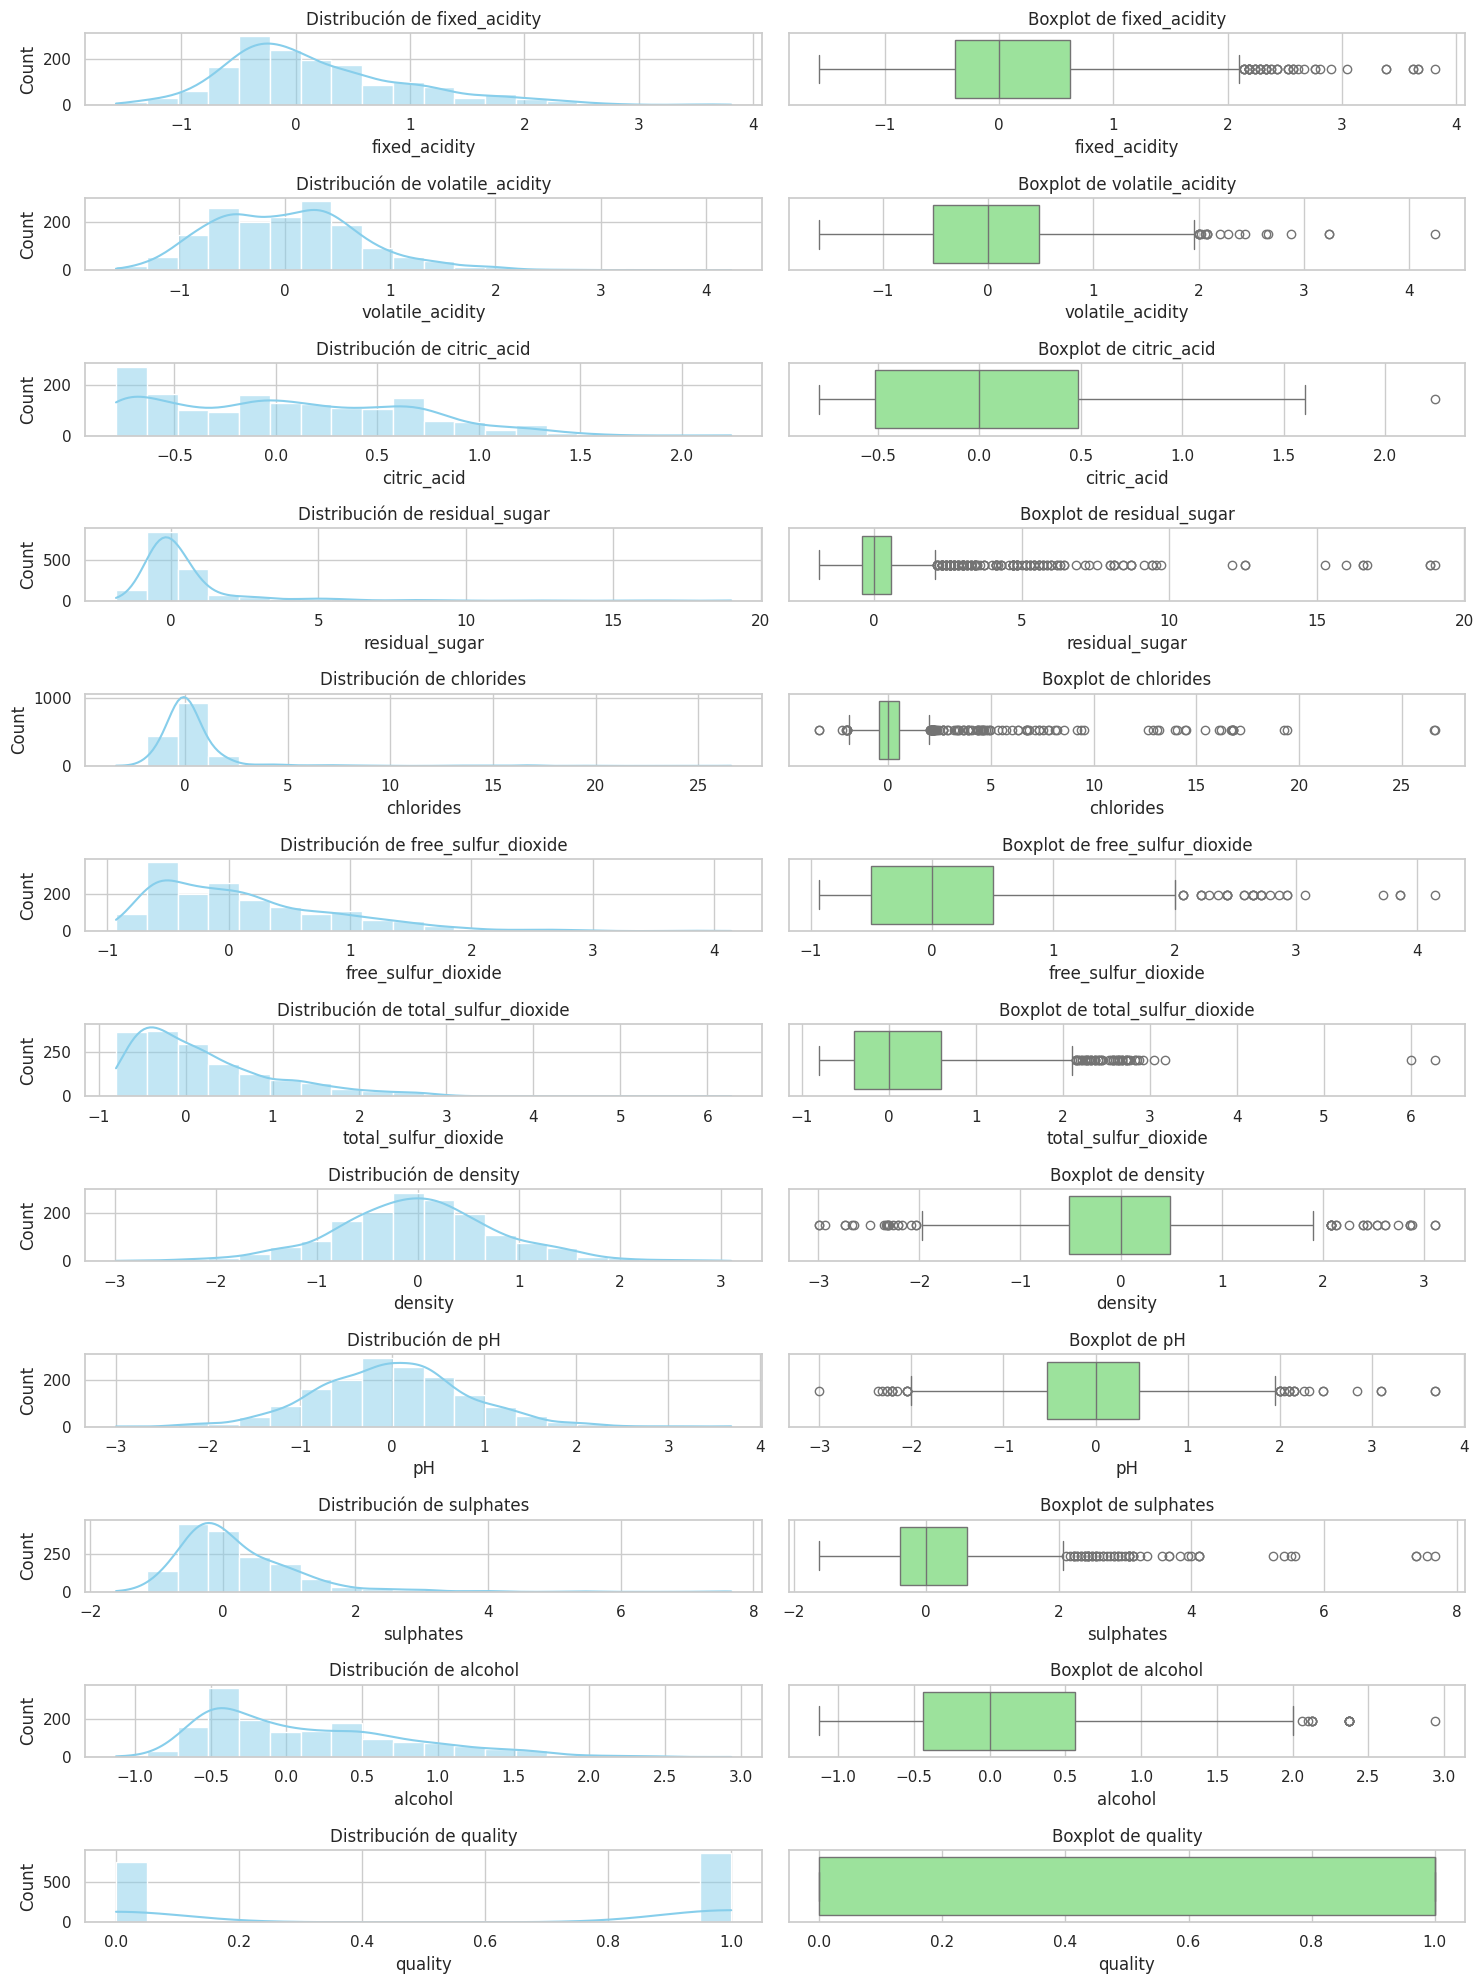

In [13]:
# Análisis univariable
variables = df_cl.columns.tolist()

# Configuración de estilo
sns.set(style="whitegrid")
plt.figure(figsize=(15, 20))

# Generar histogramas y boxplots por cada variable
for i, var in enumerate(variables):
    plt.subplot(len(variables), 2, 2*i+1)
    sns.histplot(df_cl[var], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribución de {var}')

    plt.subplot(len(variables), 2, 2*i+2)
    sns.boxplot(x=df_cl[var], color='lightgreen')
    plt.title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()

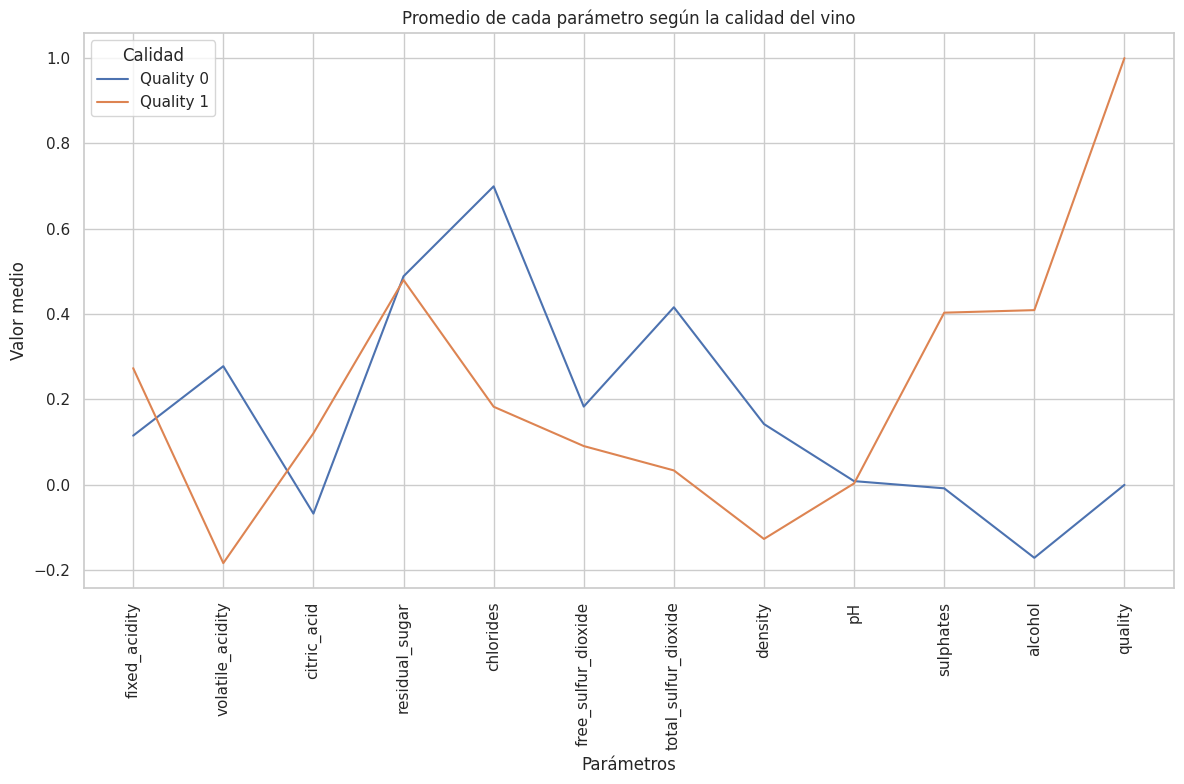

In [14]:
# Análisis multivariable
# Medias por calidad
media_por_calidad = df_cl.groupby('quality')[variables].mean().T

# Gráfico
plt.figure(figsize=(12, 8))
for quality in media_por_calidad.columns:
    plt.plot(media_por_calidad.index, media_por_calidad[quality], label=f'Quality {quality}')
plt.xticks(rotation=90)
plt.title('Promedio de cada parámetro según la calidad del vino')
plt.ylabel('Valor medio')
plt.xlabel('Parámetros')
plt.legend(title='Calidad')
plt.tight_layout()
plt.show()


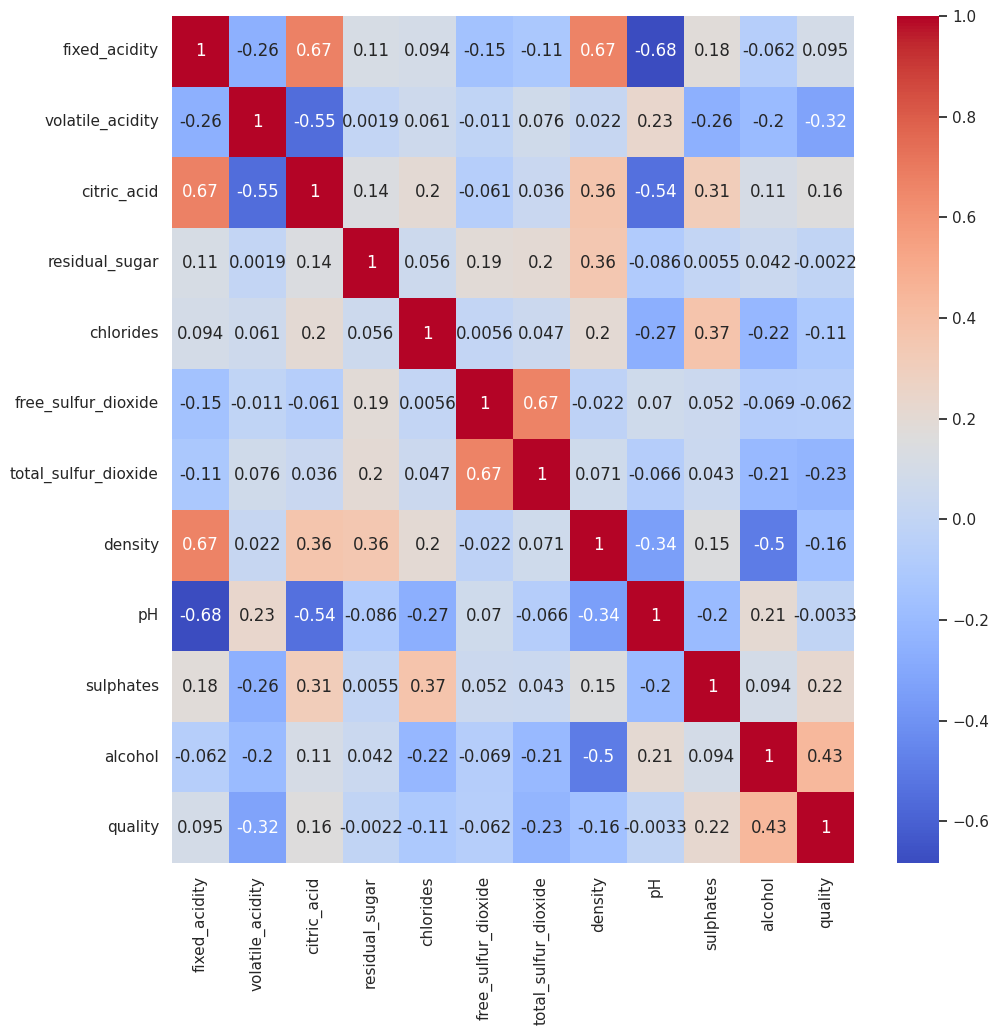

In [15]:
# Vamos a estudiar la correlación entre los distintos parámetros y la calidad.
co_mx= df_cl.corr()
# print(co_mx)
plt.figure(figsize= (11,11))
sns.heatmap(co_mx, annot=True , cmap = 'coolwarm')
plt.show()

| Variable                   | Correlación con `quality` | Observación                                                           |
| -------------------------- | ------------------------- | --------------------------------------------------------------------- |
| **alcohol**                | **+0.43**                 | 📈 Fuerte correlación positiva. Más alcohol → mejor calidad.          |
| **sulphates**              | +0.22                     | Ligera correlación positiva.                                          |
| **citric\_acid**           | +0.16                     | Baja, pero algo alineada.                                             |
| **volatile\_acidity**      | **-0.32**                 | 📉 Correlación negativa moderada. Más acidez volátil → menor calidad. |
| **density**                | -0.16                     | Leve relación inversa.                                                |
| **total\_sulfur\_dioxide** | -0.23                     | Leve efecto negativo.                                                 |


In [16]:
from google.colab import files

# Guarda el DataFrame como CSV
df_cl.to_csv('df_cl_final.csv', index=False)

# Descarga el archivo
files.download('df_cl_final.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>